# ClinicalTrials.gov Dataset
## Notebook 2: Time Series

This notebook is for examining popular words used in ClinicalTrials.gov study titles and trends for certain words over time, with a focus on interventional trials.

While the majority of research studies in ClinicalTrials.gov are interventional in nature, there are other types as well. 

From https://clinicaltrials.gov/ct2/about-studies/glossary: 

- **Interventional study:** A type of clinical study in which participants are assigned to groups that receive one or more intervention/treatment (or no intervention) so that researchers can evaluate the effects of the interventions on biomedical or health-related outcomes. The assignments are determined by the study's protocol. Participants may receive diagnostic, therapeutic, or other types of interventions.

- **Observational study:** A type of clinical study in which participants are identified as belonging to study groups and are assessed for biomedical or health outcomes. Participants may receive diagnostic, therapeutic, or other types of interventions, but the investigator does not assign participants to a specific interventions/treatment. A patient registry is a type of observational study.

- **Expanded access:** A way for patients with serious diseases or conditions who cannot participate in a clinical trial to gain access to a medical product that has not been approved by the U.S. Food and Drug Administration (FDA). Also called compassionate use. There are different expanded access types.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

### Reviewing the data

In [2]:
# Reading in the dataset
ct = pd.read_csv('data/all_records_final.csv')
ct.set_index('date', inplace = True)
ct.head()

,nct_id,title,study_type
date,,,
2017-08-28,NCT03266497,Diet Quality Among U.S.-Born and Foreign-born ...,Observational
2017-08-24,NCT03262987,Color Doppler U/S vs MSCT Venography in the Di...,Observational
2017-08-21,NCT03260543,"A 12-week, Randomized, Double-blind, Placebo-c...",Interventional
2017-08-23,NCT03263416,"Regional, Multicentric, Randomized Study Evalu...",Interventional
2017-08-28,NCT03266614,"""Recovery 4 US"" - A Photovoice-based Social Me...",Interventional


In [3]:
# Looking at the trial types in the dataset
ct['study_type'].value_counts(normalize = True)

Interventional     0.793467
Observational      0.204731
Expanded Access    0.001803
Name: study_type, dtype: float64

Expanded Access studies make up a mere 0.1803% of all of the records. I will take out these records for modeling purposes. I'm also going to remove the observational studies since I'm more interested in the interventional trials.

In [4]:
# Creating a new dataframe of just interventional trials
df = ct[ct['study_type'] == 'Interventional']
df.head()

,nct_id,title,study_type
date,,,
2017-08-21,NCT03260543,"A 12-week, Randomized, Double-blind, Placebo-c...",Interventional
2017-08-23,NCT03263416,"Regional, Multicentric, Randomized Study Evalu...",Interventional
2017-08-28,NCT03266614,"""Recovery 4 US"" - A Photovoice-based Social Me...",Interventional
2017-08-24,NCT03263338,Mobile Health Sleep and Growth Study,Interventional
2017-08-28,NCT03265080,A Phase 1 Dose-Escalation Study of ADXS NEO Ex...,Interventional


In [5]:
# Making sure the observational and expanded access studies were removed
df['study_type'].value_counts()

Interventional    253069
Name: study_type, dtype: int64

### Using CountVectorizer

Since ClinicalTrials.gov records do not have consistent numerical data, I will be focusing on textual data or more precisely, words in study titles. I'm going to start by using CountVectorizer to split up the words in the titles.

In [6]:
# Converting trial type to a numerical value
df['study_type'] = df['study_type'].map({'Interventional': 1})
df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,nct_id,title,study_type
date,,,
2017-08-21,NCT03260543,"A 12-week, Randomized, Double-blind, Placebo-c...",1
2017-08-23,NCT03263416,"Regional, Multicentric, Randomized Study Evalu...",1
2017-08-28,NCT03266614,"""Recovery 4 US"" - A Photovoice-based Social Me...",1
2017-08-24,NCT03263338,Mobile Health Sleep and Growth Study,1
2017-08-28,NCT03265080,A Phase 1 Dose-Escalation Study of ADXS NEO Ex...,1


In [7]:
# Setting our X to be the study titles
X = df['title']

In [8]:
# Instantiating CountVectorizer
cvec = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = 'english',
                             max_features = 5000) 

In [9]:
# Fitting and transforming X
X = cvec.fit_transform(X)

In [10]:
# Getting a dataframe of all the words
X_df = pd.DataFrame(X.toarray(),
                    columns = cvec.get_feature_names(),
                    index = df.index    
                   )
X_df.head()

,00,000,001,002,003,004,005,007,01,010,...,zevalin,zidovudine,zinc,ziprasidone,zoledronic,zolpidem,zone,zoster,µg,μg
date,,,,,,,,,,,,,,,,,,,,,
2017-08-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-08-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-08-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-08-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-08-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Time series

A time series with the title words would be fascinating; I would like to see how the count of words changes over time. But first, I'll begin by putting together the most commonly seen words in study titles.

In [11]:
# Viewing the words and their counts
pd.set_option('display.max_rows', None)
X_df.sum().sort_values(ascending = False)

study                      101825
patients                    68651
randomized                  64518
phase                       55206
trial                       52444
controlled                  45652
safety                      42045
treatment                   37873
efficacy                    32992
double                      30540
blind                       28581
open                        26855
placebo                     26016
dose                        24866
cancer                      23502
label                       23181
subjects                    22881
clinical                    22027
therapy                     20912
ii                          20503
single                      19483
effect                      19053
evaluate                    18732
versus                      17013
multicenter                 15216
healthy                     15199
effects                     14732
cell                        13388
prospective                 12909
disease       

In [12]:
# Creating a dataframe with the words and their counts
word_count = pd.DataFrame(X_df.sum().sort_values(ascending = False))
word_count.rename(columns = {0: 'count'}, inplace = True)
word_count.head()

,count
study,101825
patients,68651
randomized,64518
phase,55206
trial,52444


In [13]:
# Selecting the top 50 words
word_count_50 = pd.DataFrame(word_count['count'][:50])
word_count_50.rename(columns = {0: 'count'}, inplace = True)
word_count_50.head()

,count
study,101825
patients,68651
randomized,64518
phase,55206
trial,52444


''

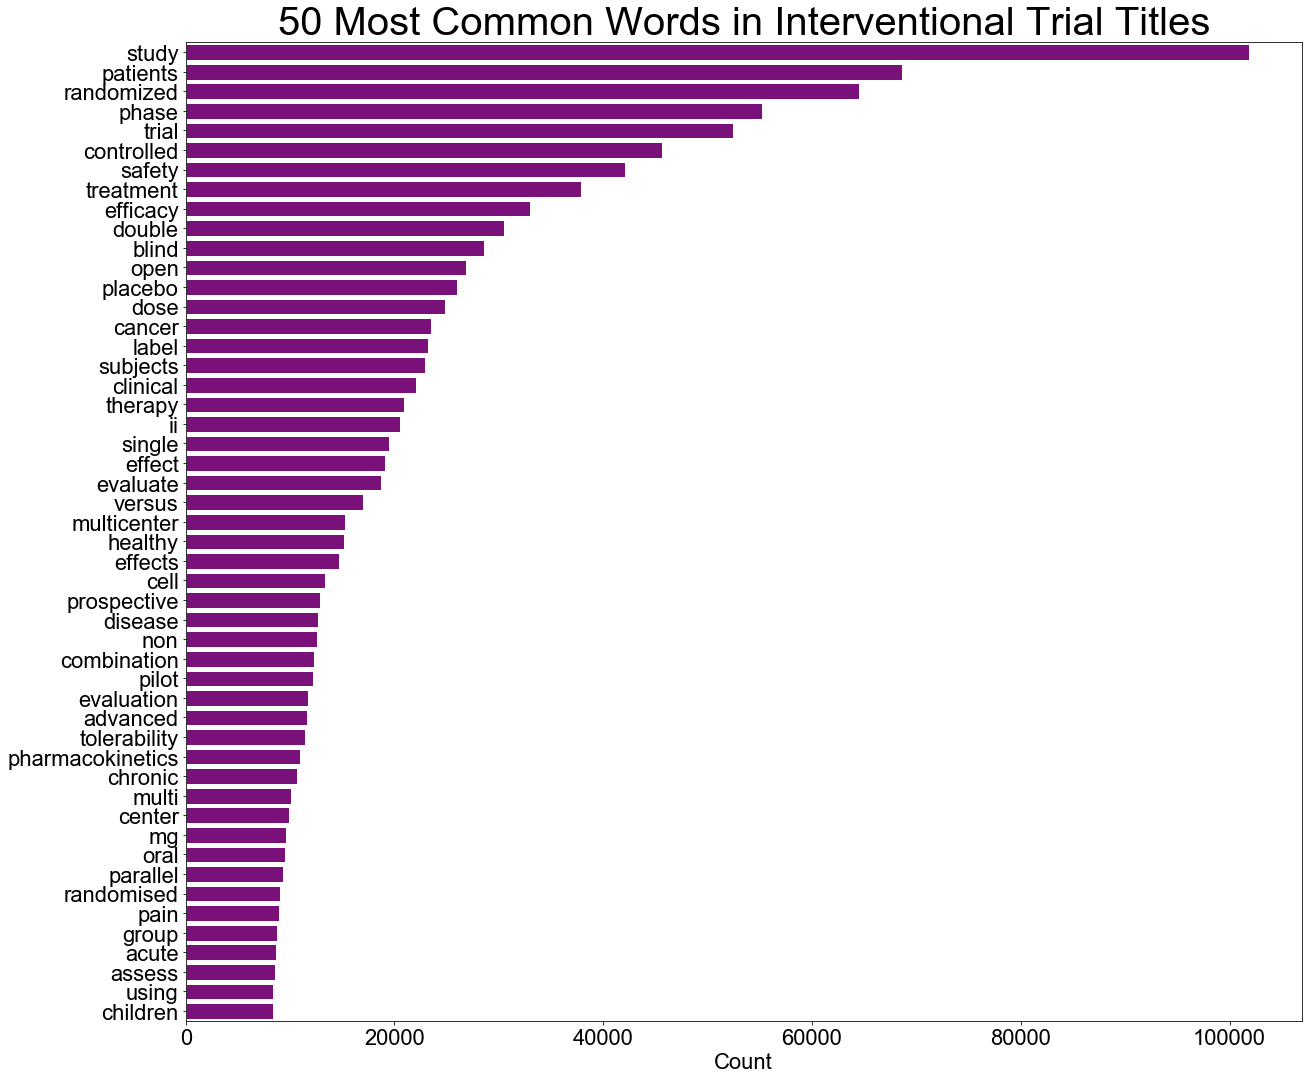

In [14]:
# Making a graph with the 50 most common words
plt.figure(figsize = (20, 18))
plt.title('50 Most Common Words in Interventional Trial Titles', fontsize = 40)

sns.set_style('whitegrid')
ax = sns.barplot(x = word_count_50['count'], y = word_count_50.index,
                 color = 'darkmagenta')
plt.ylabel('', fontsize = 22)
plt.xlabel('Count', fontsize = 22)
ax.tick_params(labelsize = 22)
plt.savefig('images/top_50_words.jpg')
;

Now I want to review the number of interventional trial records that were posted each year.

In [15]:
# Breaking down the number of trial records posted per year
df.index = pd.to_datetime(df.index)
df_year = df.resample('A').sum()
df_year.index = df_year.index.year
df_year.rename(columns = {'study_type': 'trials'}, inplace = True)
df_year.head()

,trials
date,
1999,448
2000,189
2001,1429
2002,964
2003,3284


''

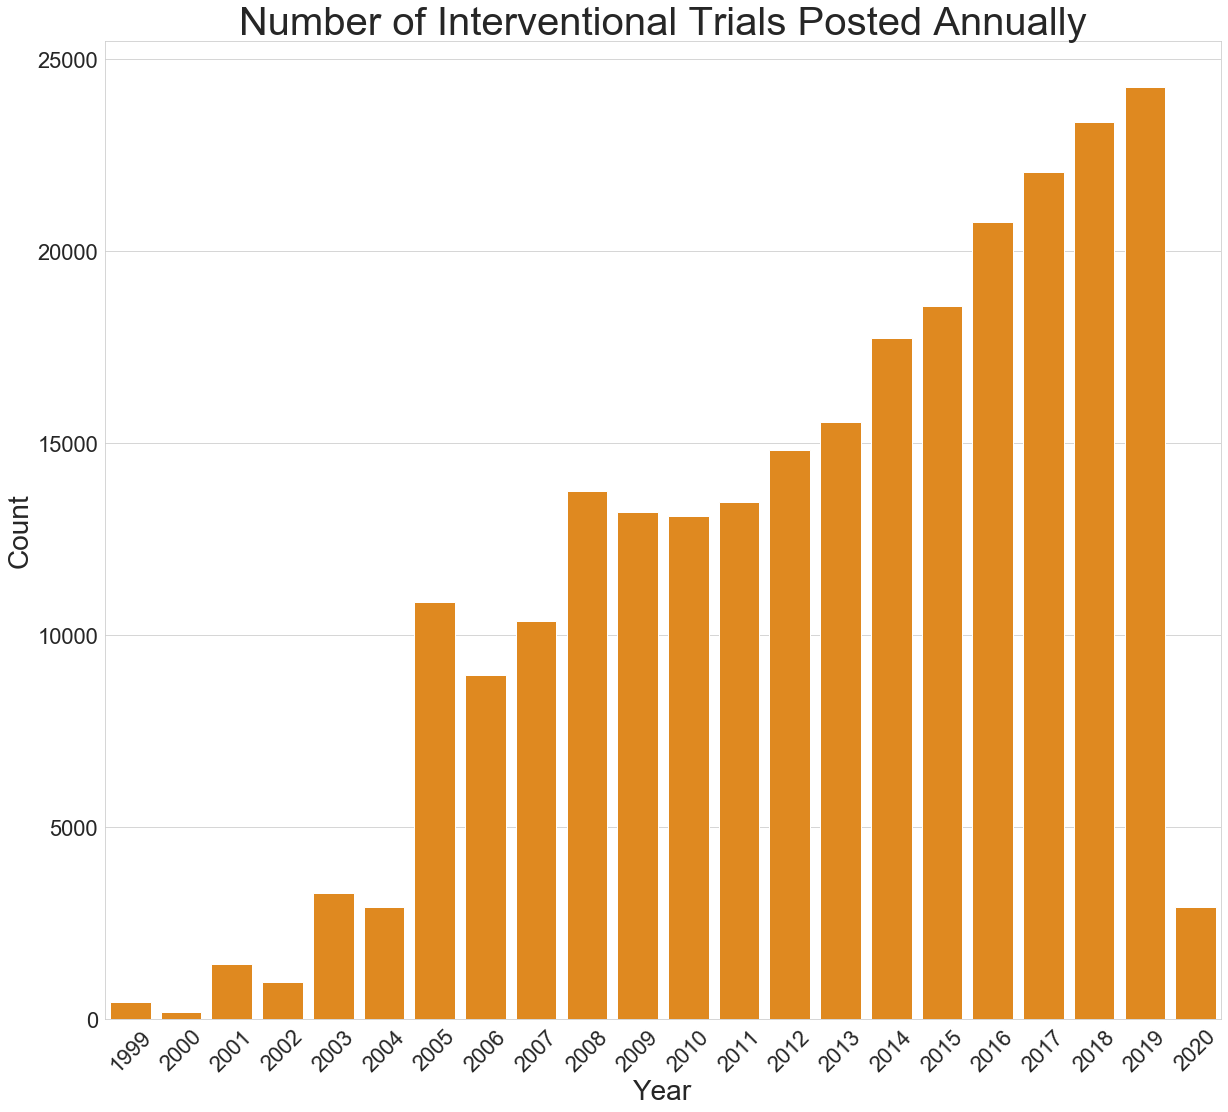

In [16]:
# Graphing the number of interventional trials over time
plt.figure(figsize = (20, 18))
plt.title('Number of Interventional Trials Posted Annually', fontsize = 40)

ax = sns.barplot(y = df_year['trials'], x = df_year.index,
                 color = 'darkorange')
plt.ylabel('Count', fontsize = 28)
plt.xlabel('Year', fontsize = 28)
ax.tick_params(labelsize = 22)
ax.set_xticklabels(labels = df_year.index, rotation = 45)
plt.savefig('images/trials_over_time.jpg')
;

Back to the words, upon review, I am selecting the word ```pharmacokinetics``` for now since it appears 10,950 times and is often studied in clinical trials.

In [17]:
# Making the index datetime
X_df.index = pd.to_datetime(X_df.index)
type(X_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [18]:
# Modifying the dataframe to group by year
X_df_year = X_df.resample('A').sum() 
X_df_year.index = X_df_year.index.year
X_df_year.head()

,00,000,001,002,003,004,005,007,01,010,...,zevalin,zidovudine,zinc,ziprasidone,zoledronic,zolpidem,zone,zoster,µg,μg
date,,,,,,,,,,,,,,,,,,,,,
1999,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2000,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,0,0
2001,0,12,0,1,3,0,0,1,0,0,...,0,175,0,0,0,0,0,6,0,0
2002,2,0,0,0,1,0,0,3,7,2,...,2,3,0,0,3,0,0,1,0,0
2003,3,0,1,0,0,3,2,2,19,5,...,9,3,1,0,9,0,1,0,0,0


''

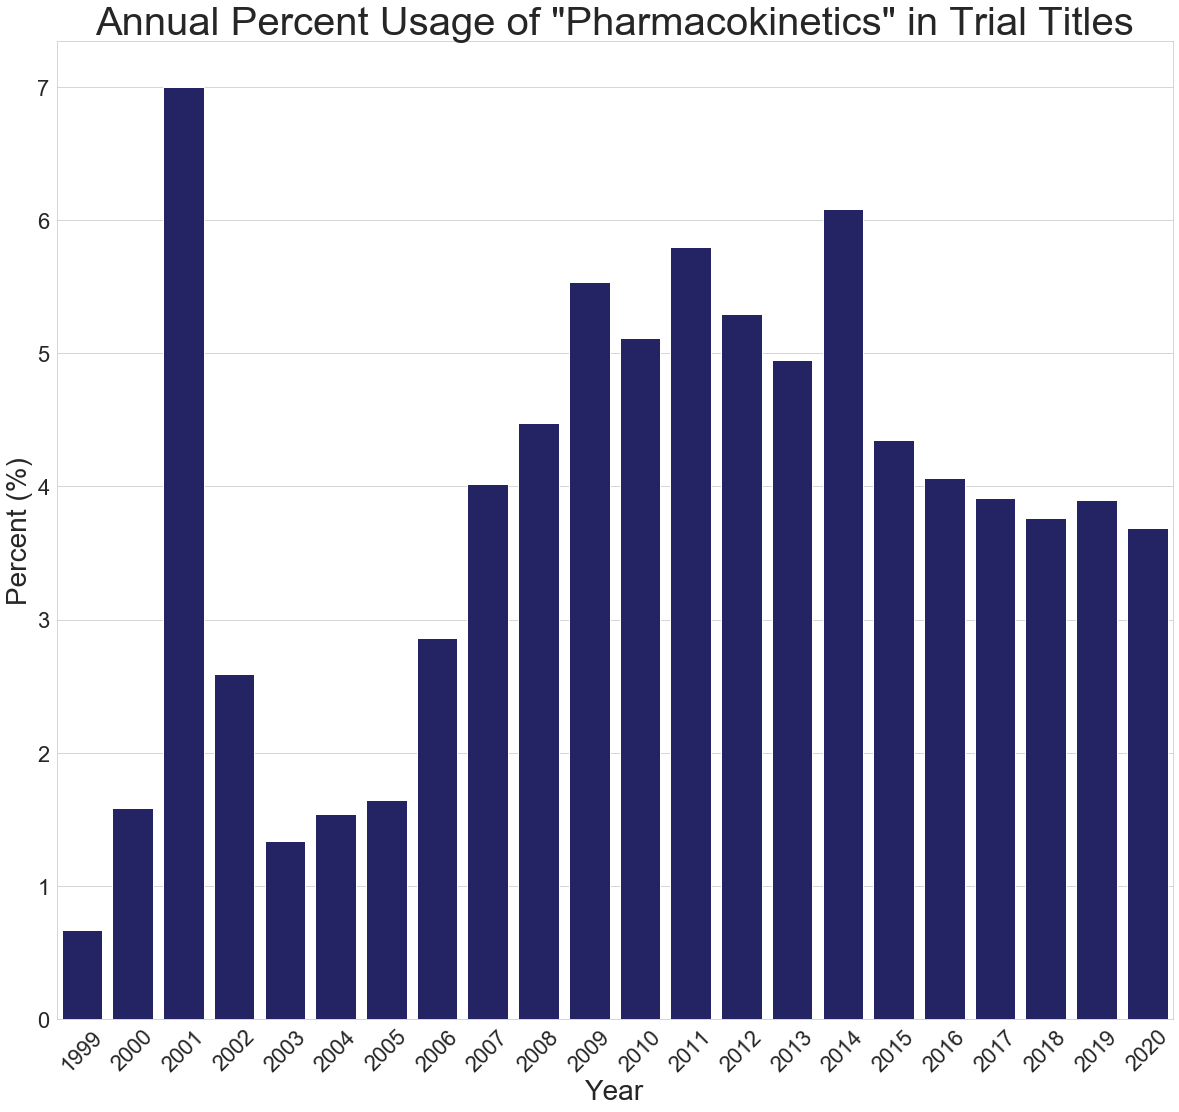

In [19]:
# Graphing the percent usage of "pharmacokinetics" over time
plt.figure(figsize = (20, 18))
plt.title('Annual Percent Usage of "Pharmacokinetics" in Trial Titles', fontsize = 40)

#sns.set_style('whitegrid')
ax = sns.barplot(y = ((X_df_year['pharmacokinetics'] / df_year['trials']) * 100), x = X_df_year.index,
                 color = 'midnightblue')
plt.ylabel('Percent (%)', fontsize = 28)
plt.xlabel('Year', fontsize = 28)
ax.tick_params(labelsize = 22)
ax.set_xticklabels(labels = X_df_year.index, rotation = 45)
plt.savefig('images/pharmacokinetics.jpg')
;

Pharmacokinetics went up in usage but is now being used less over the last few years.

As it turns out, simply plotting the counts of pharmacokinetics by year tells a different story as seen in the following graph. It seems that this word showing up with each passing year. 

However, expressing the appearance of words by percentage tells a more accurate story since it turns out that more records have been posted to ClinicalTrials.gov each subsequent year.

''

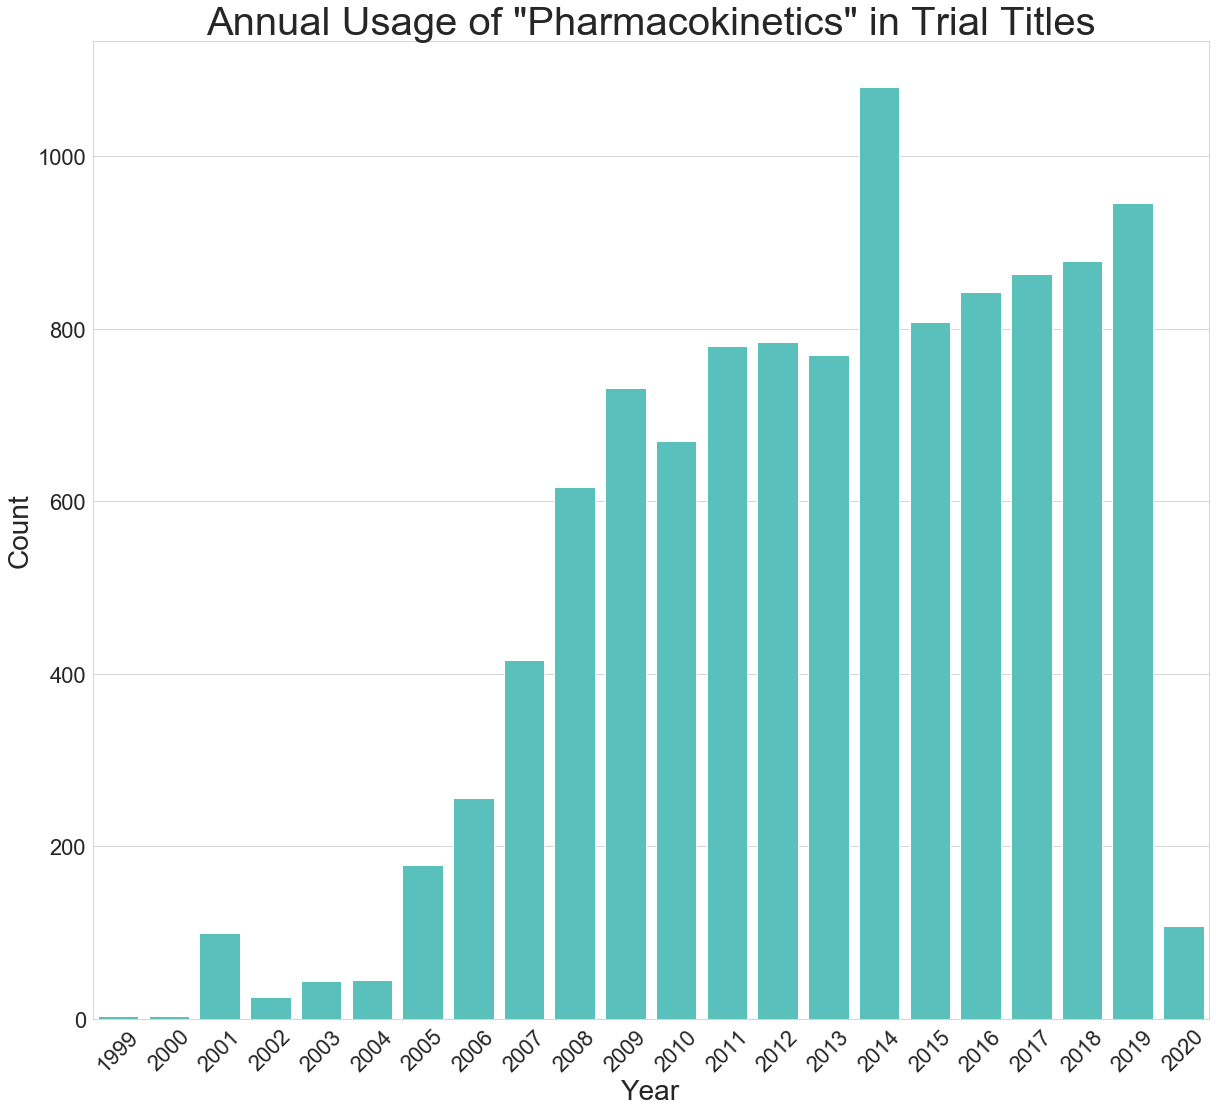

In [20]:
# Graphing the usage of "pharmacokinetics" over time
plt.figure(figsize = (20, 18))
plt.title('Annual Usage of "Pharmacokinetics" in Trial Titles', fontsize = 40)

#sns.set_style('whitegrid')
ax = sns.barplot(y = X_df_year['pharmacokinetics'], x = X_df_year.index,
                 color = 'mediumturquoise')
plt.ylabel('Count', fontsize = 28)
plt.xlabel('Year', fontsize = 28)
ax.tick_params(labelsize = 22)
ax.set_xticklabels(labels = X_df_year.index, rotation = 45)
plt.savefig('images/pharmacokinetics_counts.jpg')
;

The next word I'm selecting to review is "cancer." It seems to be going down over time but may be replaced by more specific and technical descriptors.

''

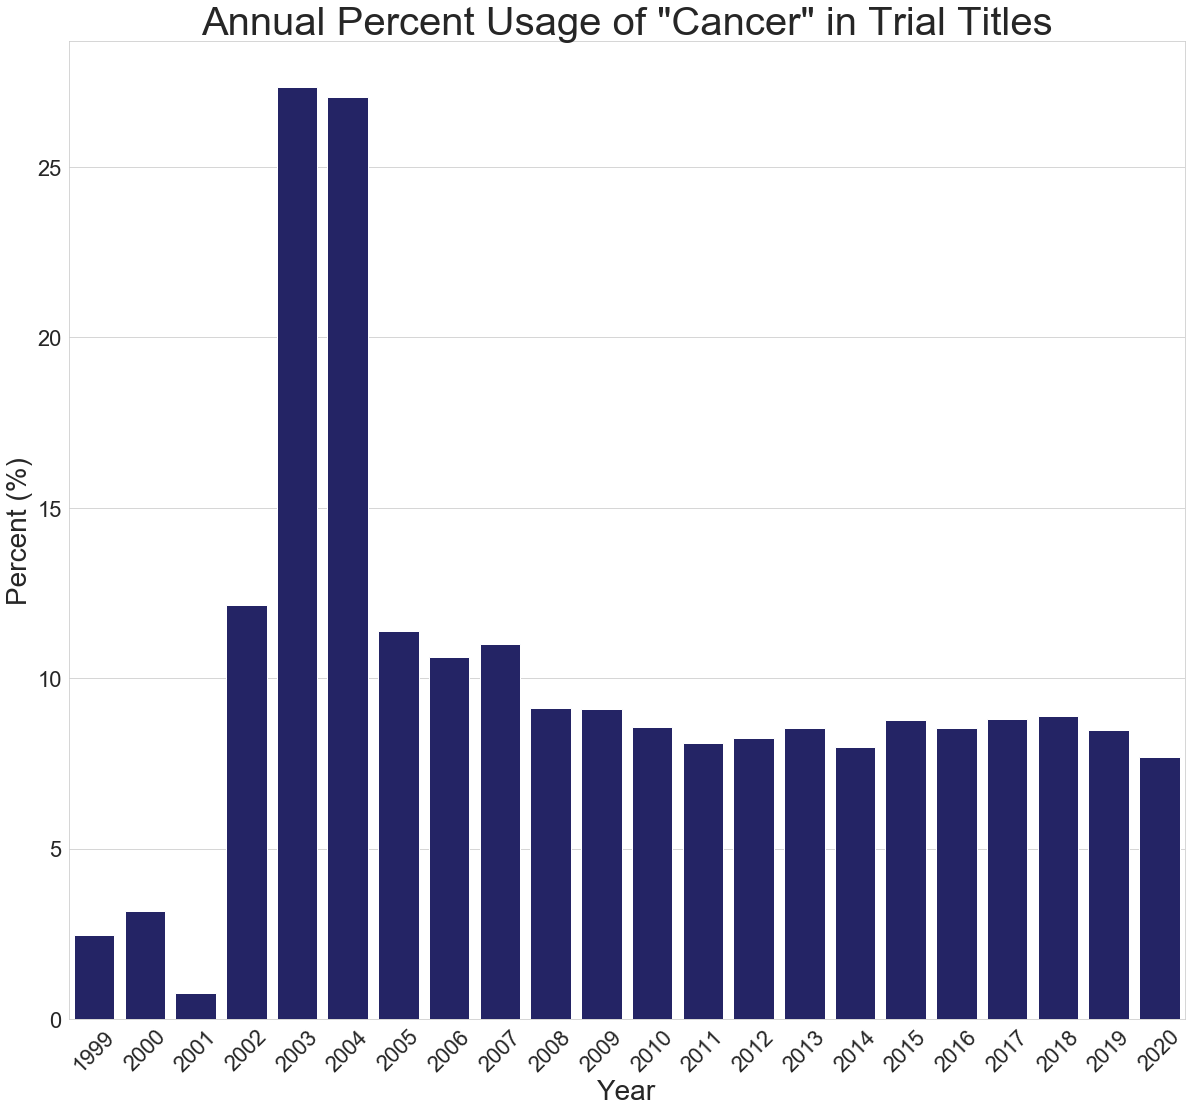

In [21]:
# Graphing the percent usage of "cancer" over time
plt.figure(figsize = (20, 18))
plt.title('Annual Percent Usage of "Cancer" in Trial Titles', fontsize = 40)

#sns.set_style('whitegrid')
ax = sns.barplot(y = ((X_df_year['cancer'] / df_year['trials']) * 100), x = X_df_year.index,
                 color = 'midnightblue')
plt.ylabel('Percent (%)', fontsize = 28)
plt.xlabel('Year', fontsize = 28)
ax.tick_params(labelsize = 22)
ax.set_xticklabels(labels = X_df_year.index, rotation = 45)
plt.savefig('images/cancer.jpg')
;

On a similar note, the next word I'm selecting to review is "chemotherapy." There may be a slight downward trend in useage over time.

''

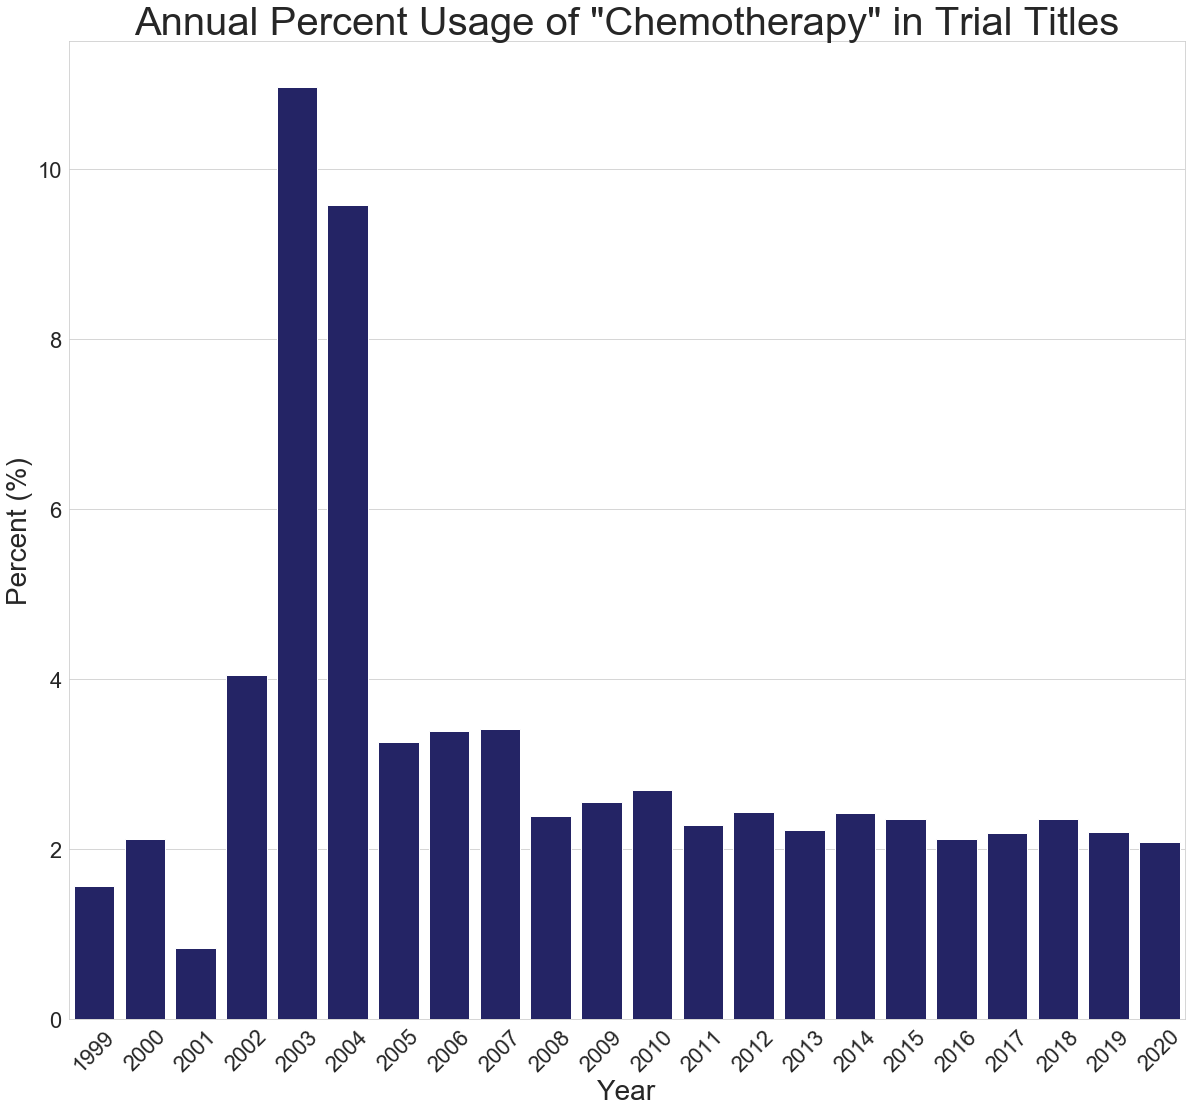

In [22]:
# Graphing the percent usage of "chemotherapy" over time
plt.figure(figsize = (20, 18))
plt.title('Annual Percent Usage of "Chemotherapy" in Trial Titles', fontsize = 40)

#sns.set_style('whitegrid')
ax = sns.barplot(y = ((X_df_year['chemotherapy'] / df_year['trials']) * 100), x = X_df_year.index,
                 color = 'midnightblue')
plt.ylabel('Percent (%)', fontsize = 28)
plt.xlabel('Year', fontsize = 28)
ax.tick_params(labelsize = 22)
ax.set_xticklabels(labels = X_df_year.index, rotation = 45)
plt.savefig('images/chemotherapy.jpg')
;

"Randomized" will be the next word. It seems to be relatively steady the past few years.

''

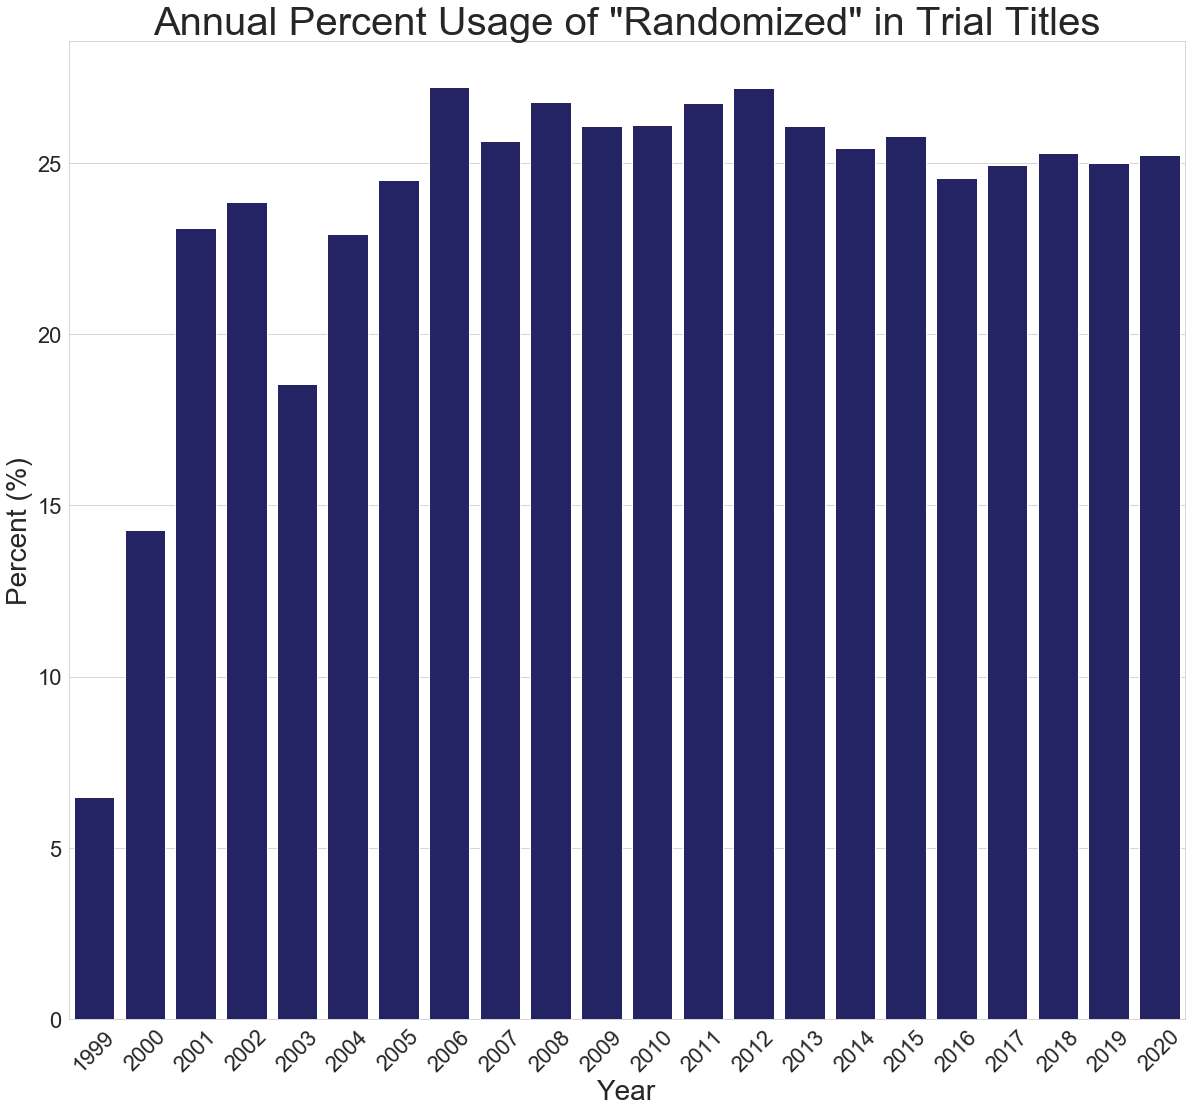

In [23]:
# Graphing the percent usage of "randomized" over time
plt.figure(figsize = (20, 18))
plt.title('Annual Percent Usage of "Randomized" in Trial Titles', fontsize = 40)

#sns.set_style('whitegrid')
ax = sns.barplot(y = ((X_df_year['randomized'] / df_year['trials']) * 100), x = X_df_year.index,
                 color = 'midnightblue')
plt.ylabel('Percent (%)', fontsize = 28)
plt.xlabel('Year', fontsize = 28)
ax.tick_params(labelsize = 22)
ax.set_xticklabels(labels = X_df_year.index, rotation = 45)
plt.savefig('images/randomized.jpg')
;

Ritonavir is an antiviral drug used to treat HIV. I wanted to see if its appearance diminished over time. While it has appeared less frequently in the last few years, there is a noticable jump just in the early part of 2020. As it turns out, this medication is being tested as a possible treatment for those infected with the novel coronavirus COVID-19. 

''

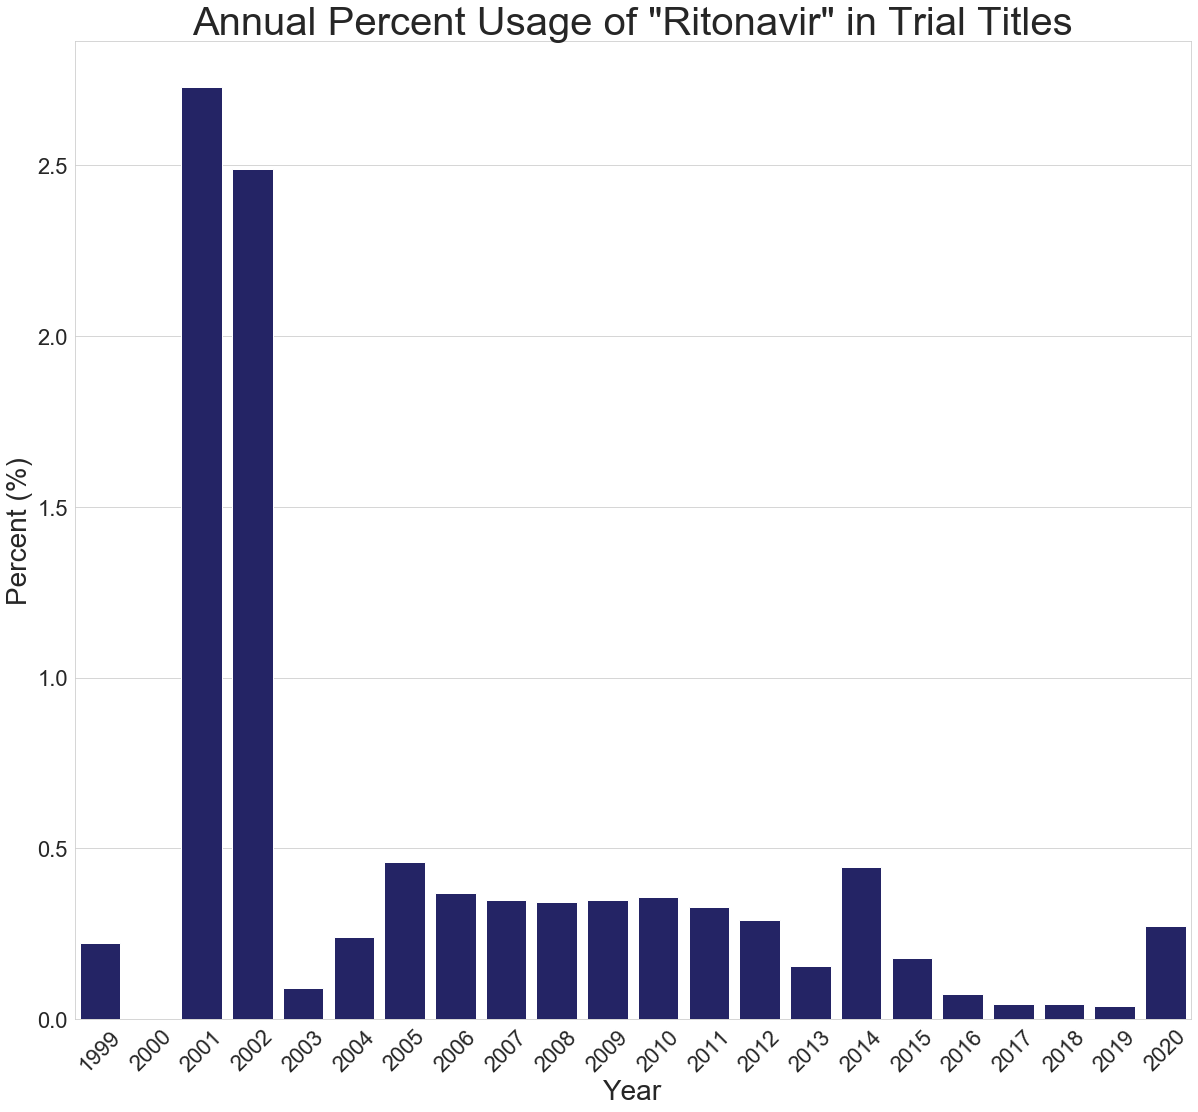

In [24]:
# Graphing the percent usage of "ritonavir" over time
plt.figure(figsize = (20, 18))
plt.title('Annual Percent Usage of "Ritonavir" in Trial Titles', fontsize = 40)

#sns.set_style('whitegrid')
ax = sns.barplot(y = ((X_df_year['ritonavir'] / df_year['trials']) * 100), x = X_df_year.index,
                 color = 'midnightblue')
plt.ylabel('Percent (%)', fontsize = 28)
plt.xlabel('Year', fontsize = 28)
ax.tick_params(labelsize = 22)
ax.set_xticklabels(labels = X_df_year.index, rotation = 45)
plt.savefig('images/ritonavir.jpg')
;

Lopinavir is another antiviral medication used to treat HIV. It is also currently being tested as a possible treatment for COVID-19. As with ritonavir, a spike in trial titles is seen in early 2020.

''

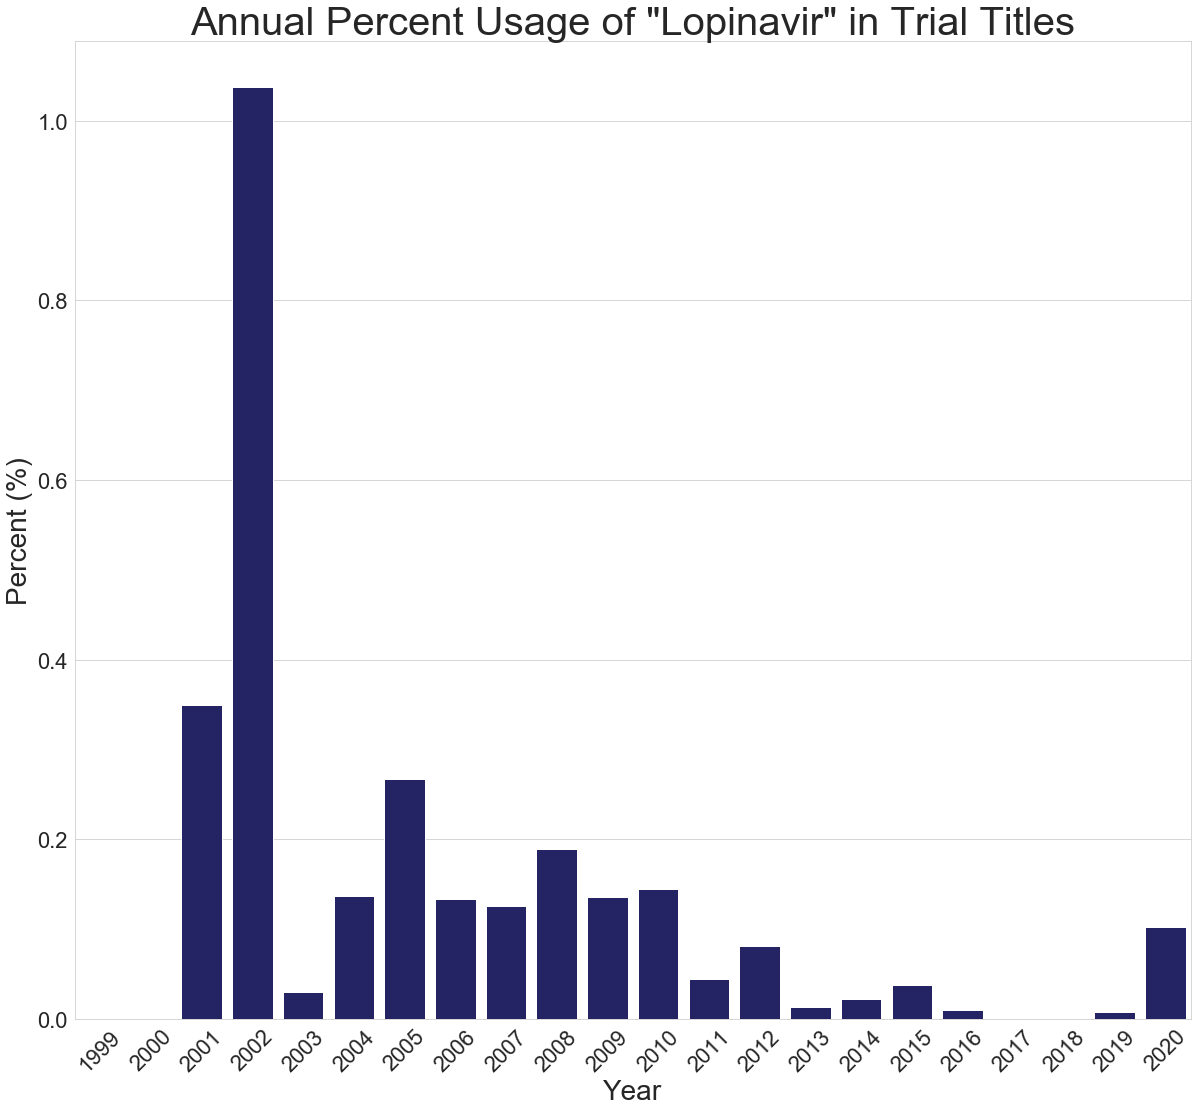

In [25]:
# Graphing the percent usage of "lopinavir" over time
plt.figure(figsize = (20, 18))
plt.title('Annual Percent Usage of "Lopinavir" in Trial Titles', fontsize = 40)

ax = sns.barplot(y = ((X_df_year['lopinavir'] / df_year['trials']) * 100), x = X_df_year.index,
                 color = 'midnightblue')
plt.ylabel('Percent (%)', fontsize = 28)
plt.xlabel('Year', fontsize = 28)
ax.tick_params(labelsize = 22)
ax.set_xticklabels(labels = X_df_year.index, rotation = 45)
plt.savefig('images/lopinavir.jpg')
;